# Basic Guide

### Packages

In [9]:
# Resilient Plotter Class
from resilientplotterclass import rpclass

# Supporting packages
import geopandas as gpd
import os
import rioxarray as rxr
import xugrid as xu

### Guidelines

In [10]:
# Settings guidelines
rpc = rpclass('basic_guide', cartopy=True)

# Show guidelines
rpc.show_guidelines()

# Get coordinate reference system (CRS) and vertical reference level (VRL) from guidelines
crs = rpc.get_guidelines()['general']['crs']
vrl = rpc.get_guidelines()['general']['vrl']

### Reading data
Note: This requires access to the Deltares n-drive.

In [ ]:
# Directory path
dir_path_data = r'n:\Deltabox\Bulletin\white_rn\rpc_data'
file_path_tif = os.path.join(dir_path_data, 'structured_data.tif')
file_path_nc = os.path.join(dir_path_data, 'unstructured_data.nc')
file_path_geojson = os.path.join(dir_path_data, 'geometry.geojson')

# Read structured data
da = rxr.open_rasterio(file_path_tif, masked=True).squeeze().drop_var
da.attrs = {'long_name': 'Bathymetry', 'units': 'm'+vrl}
ds = da.to_dataset(name='mor_bl')

# Read unstructured data
uds = xu.open_dataset(file_path_nc)
uds.grid.set_crs('EPSG:28992')
uda = uds['mesh2d_mor_bl']

# Read geometry
gdf = gpd.read_file(file_path_geojson)

### Structured data

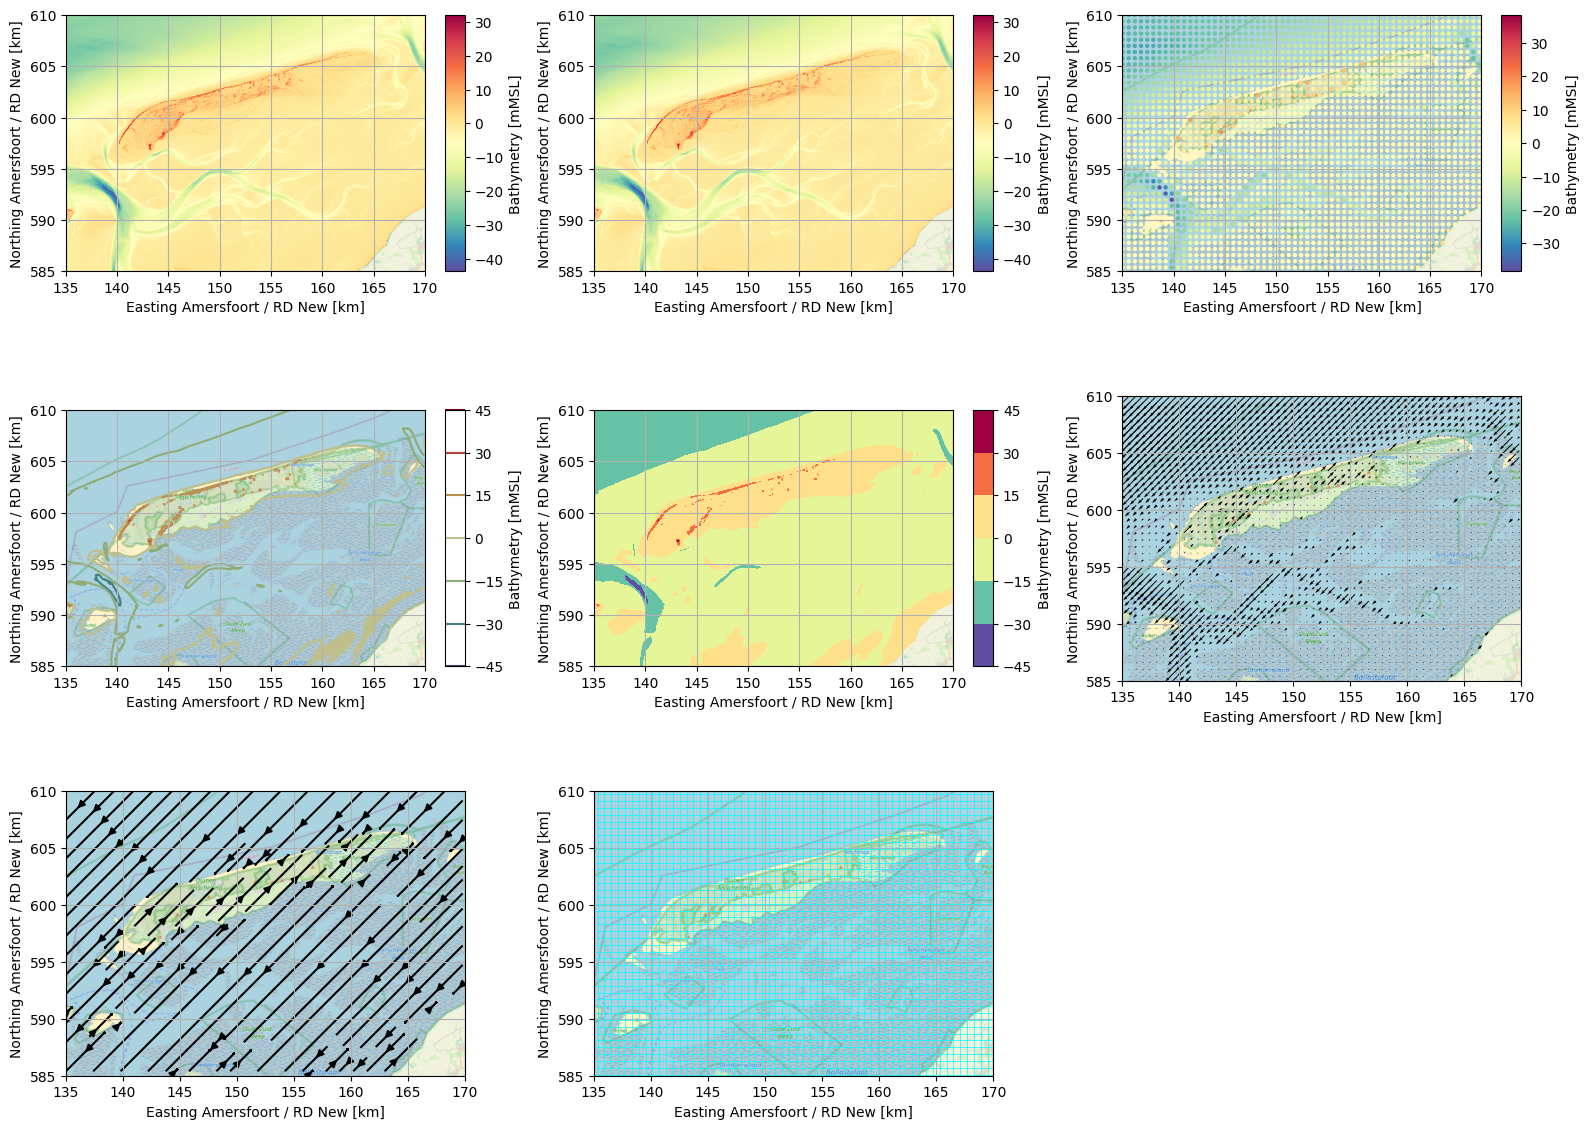

In [5]:
# Plot structured data
fig, axs = rpc.subplots(3, 3, figsize=(16, 12))
axs = axs.flatten()
rpc.pcolormesh(da, ax=axs[0], data_style='default')
rpc.imshow(da,     ax=axs[1], data_style='default')
rpc.scatter(ds,    ax=axs[2], data_style='default', x='x', y='y', hue='mor_bl', s=10, add_colorbar=True, skip=30)
rpc.contour(da,    ax=axs[3], data_style='default', add_colorbar=True)
rpc.contourf(da,   ax=axs[4], data_style='default')
rpc.quiver(ds,     ax=axs[5], data_style='default', x='x', y='y', u='mor_bl', v='mor_bl', skip=30)
rpc.streamplot(ds, ax=axs[6], data_style='default', x='x', y='y', u='mor_bl', v='mor_bl', skip=30)
rpc.grid(da,       ax=axs[7], geom_style='grid', skip=30)
for ax in axs:
    rpc.basemap(crs=crs, ax=ax, map_style='default', extent_style='default')
axs[-1].remove()
rpc.show(fig=fig)

### Unstructured data

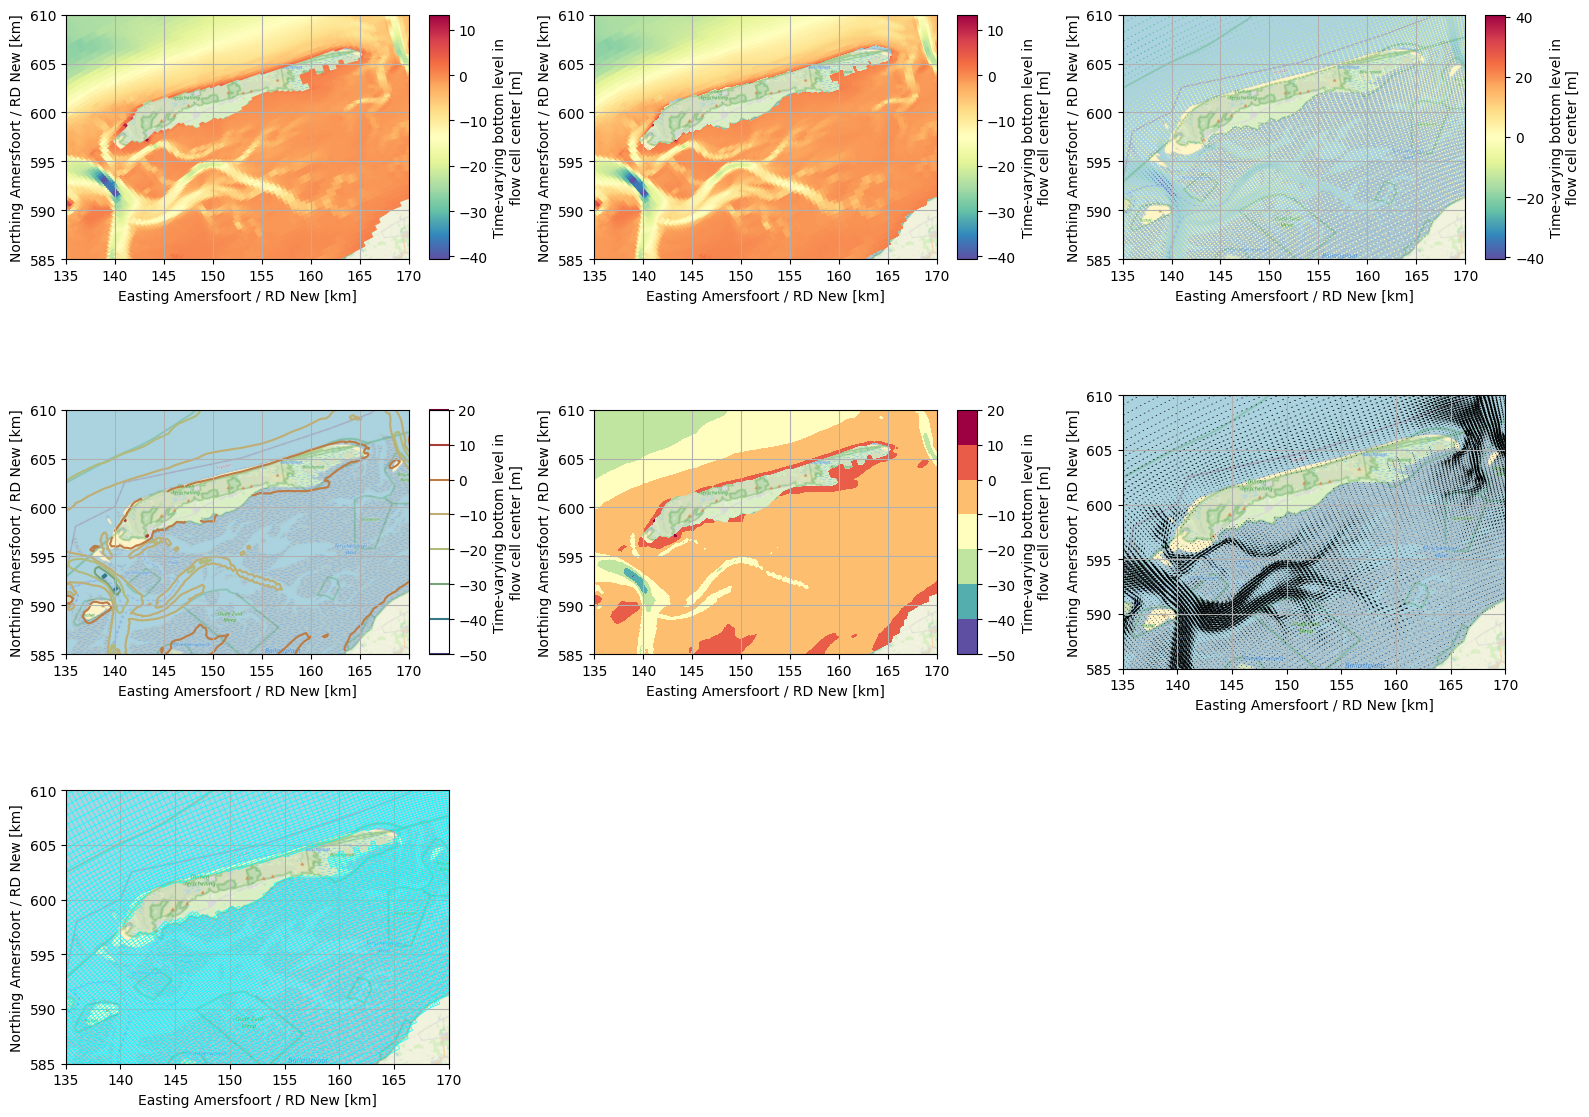

In [6]:
# Plot unstructured data
fig, axs = rpc.subplots(3, 3, figsize=(16, 12))
axs = axs.flatten()
rpc.pcolormesh(uda, ax=axs[0], data_style='default')
rpc.imshow(uda,     ax=axs[1], data_style='default')
rpc.scatter(uda,    ax=axs[2], data_style='default', s=1, add_colorbar=True)
rpc.contour(uda,    ax=axs[3], data_style='default', add_colorbar=True)
rpc.contourf(uda,   ax=axs[4], data_style='default')
rpc.quiver(uds,     ax=axs[5], data_style='default', x='mesh2d_face_x', y='mesh2d_face_y', u='mesh2d_ucx', v='mesh2d_ucy')
rpc.grid(uda,       ax=axs[6], geom_style='grid')
for ax in axs:
    rpc.basemap(crs=crs, ax=ax, map_style='default', extent_style='default')
axs[-2].remove()
axs[-1].remove()
rpc.show(fig=fig)

### Geometries and Basemaps

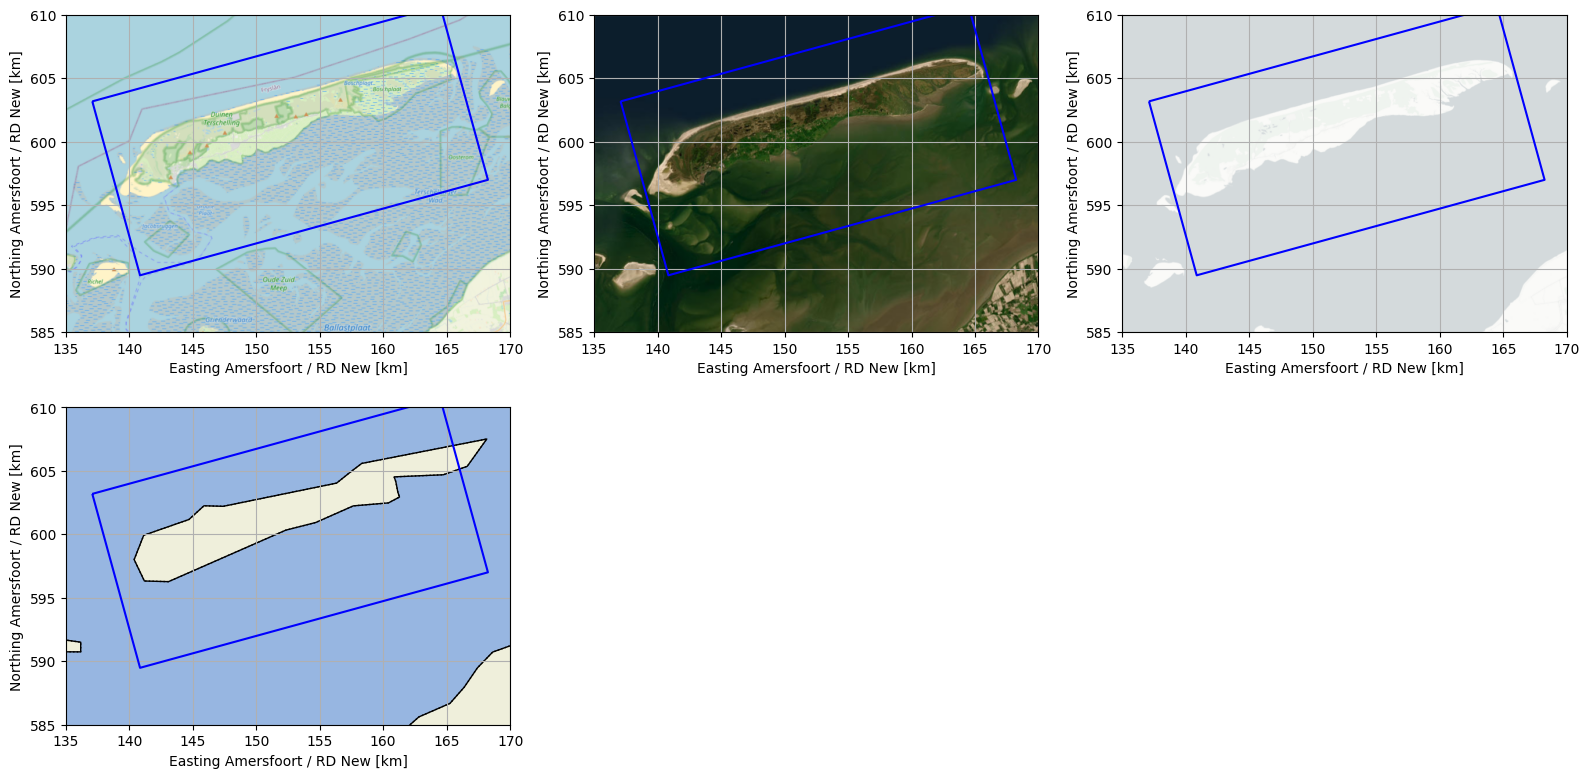

In [7]:
# Plot geometry and basemaps
fig, axs = rpc.subplots(2, 3, figsize=(16, 8))
axs = axs.flatten()
rpc.geometries(gdf,  ax=axs[0], geom_style='aoi')
rpc.basemap(crs=crs, ax=axs[0], map_style='osm', extent_style='default')
rpc.geometries(gdf,  ax=axs[1], geom_style='aoi')
rpc.basemap(crs=crs, ax=axs[1], map_style='satellite', extent_style='default')
rpc.geometries(gdf,  ax=axs[2], geom_style='aoi')
rpc.basemap(crs=crs, ax=axs[2], map_style='grey', extent_style='default')
rpc.geometries(gdf,  ax=axs[3], geom_style='aoi')
rpc.cartopy(ax=axs[3], extent_style='default')
axs[-2].remove()
axs[-1].remove()
rpc.show(fig=fig)

### Interactive maps

 Reprojecting DataArray to EPSG:4326.
 Reprojecting GeoDataFrame to EPSG:4326.



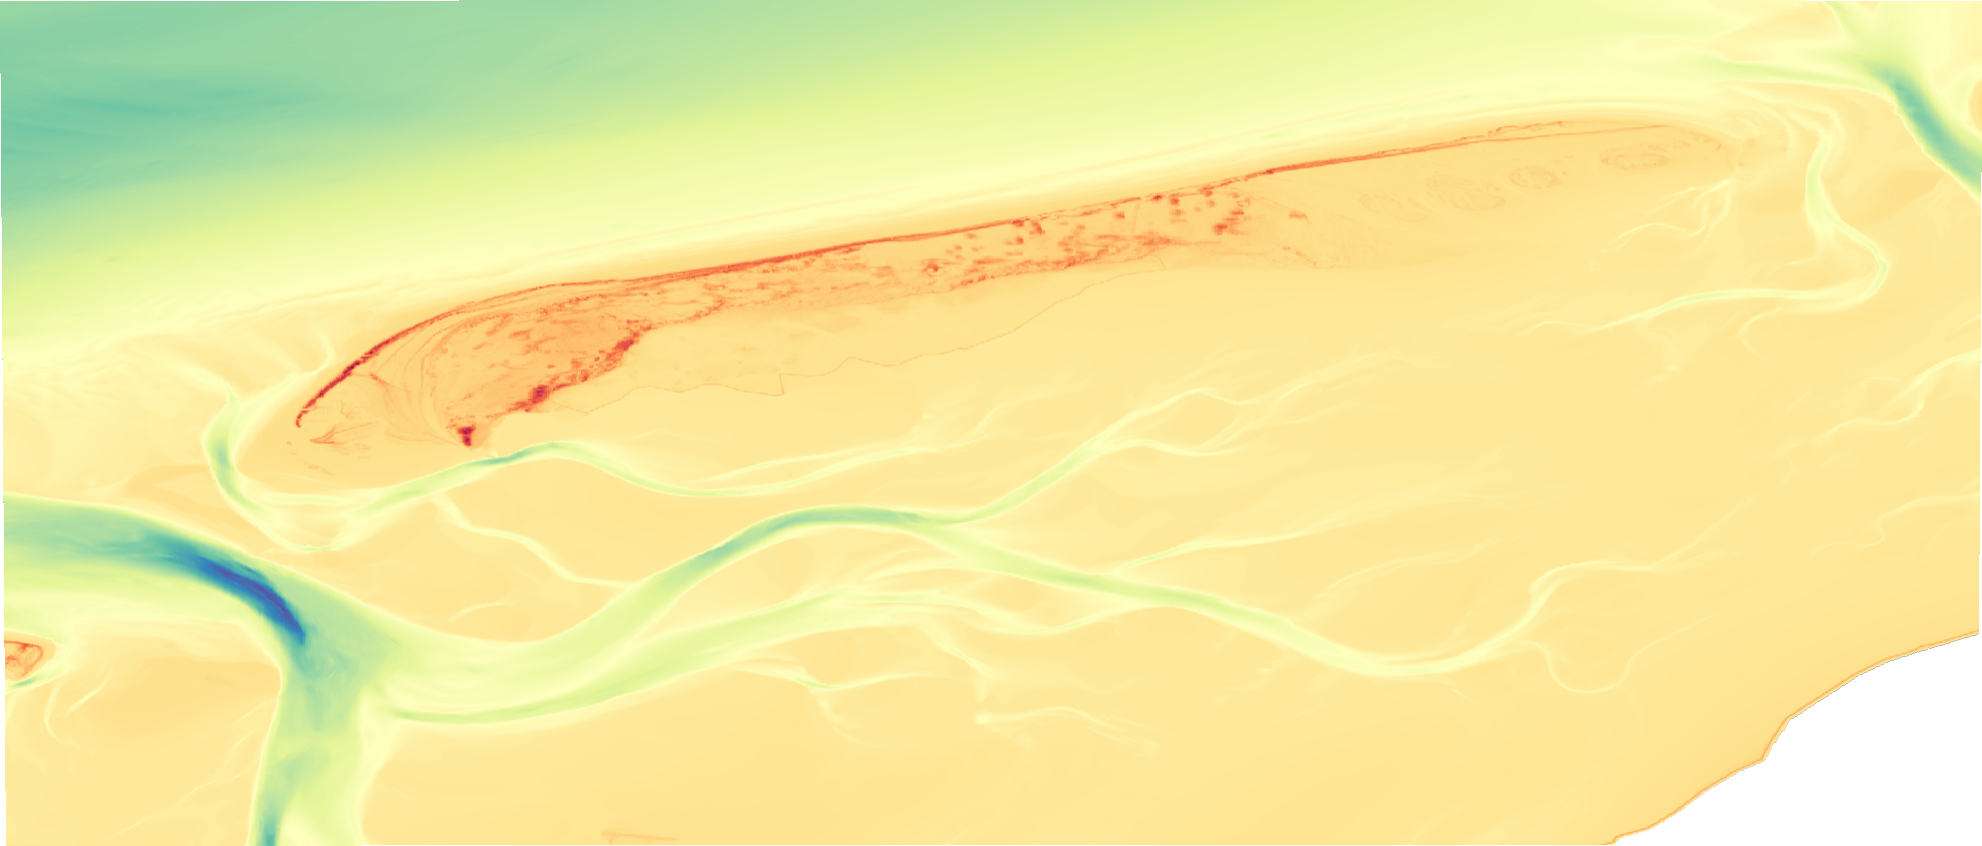

In [8]:
m = rpc.map()
rpc.imshow(da, m=m, name='mor_bl')
rpc.geometries(gdf, m=m, name='aoi')
rpc.show(m=m)